[参考](https://www.kaggle.com/nitindatta/what-causes-heart-disease)。

前面探索性数据分析的东西比较重要，中间有一个 outline 的检查，最后是模型的比较。

In [1]:
import pandas as pd

df = pd.read_csv("../input/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


类别变量

1、Sex- 性别

2、cp- chest pain type（胸痛型）

3、fbs- 空腹血糖 > 120 ，1=是，0=否

4、restecg：心电图结果

5、exang-exercise：诱发心绞痛，1=是，0=否

6、thal- 3 = normal; 6 = 固定缺陷; 7 = 可逆缺陷

连续变量

1、age- 年龄

2、trestbps- 静息血压（入院时的mm Hg）

3、chol- 血清胆固醇

In [2]:
# 没有缺失值
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


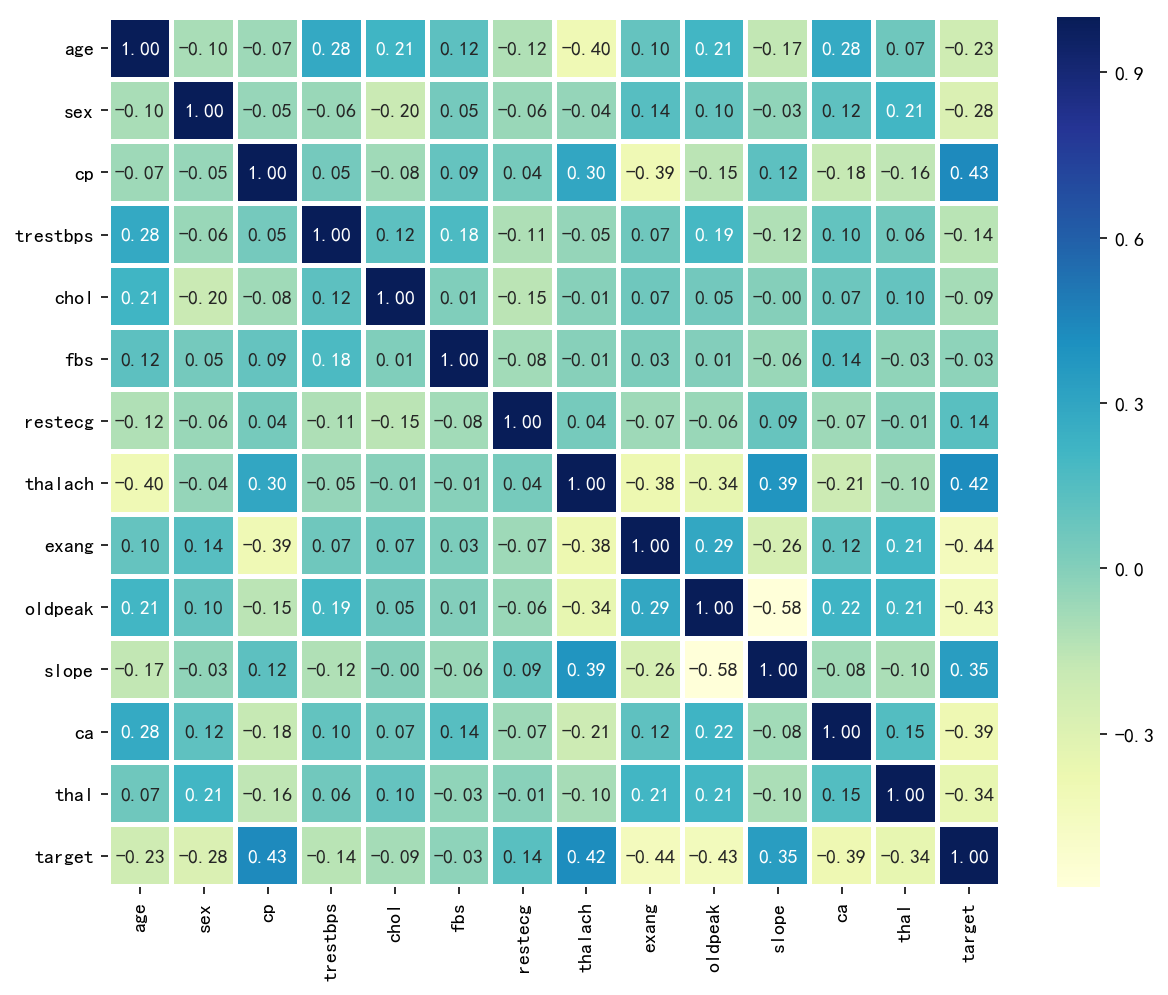

In [3]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', fmt='.2f', linewidths=2)
plt.show()

绝对值最大的是 $-0.58$。

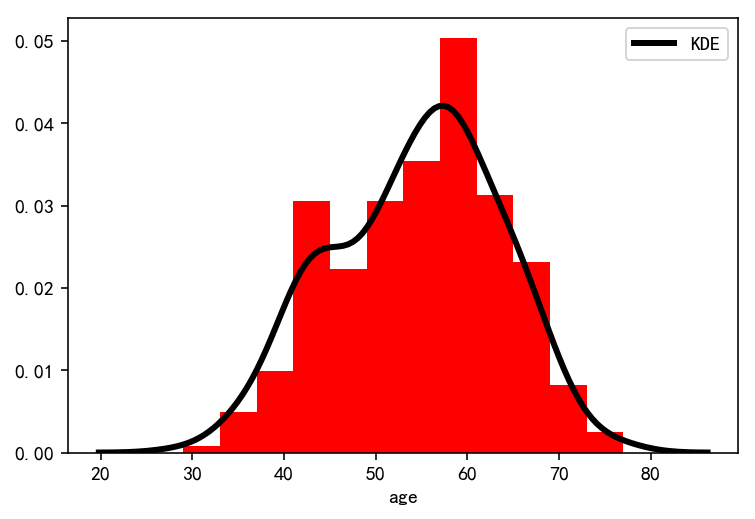

In [4]:
# 查看年龄分布
sns.distplot(
    df['age'],
    color='Red',
    hist_kws={'alpha': 1,
              "linewidth": 2},
    kde_kws={
        "color": "k",
        "lw": 3,
        "label": "KDE"
    })
plt.show()

对连续变量的处理：分箱。

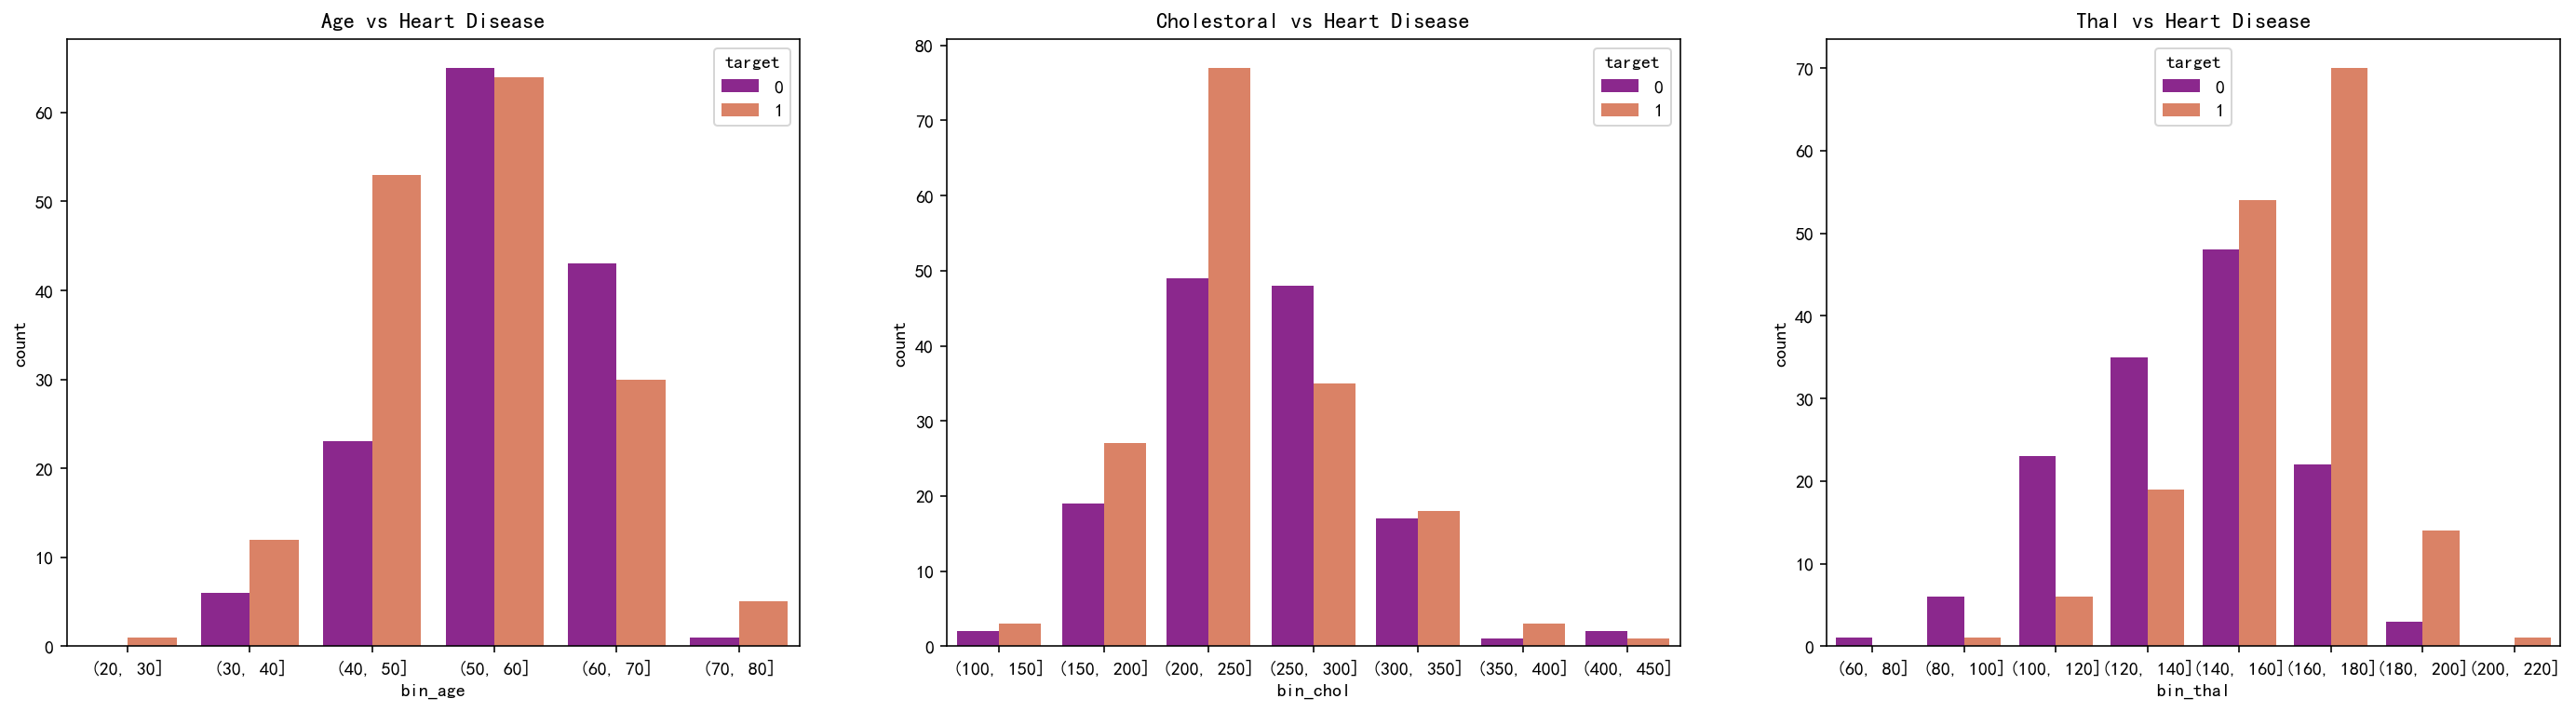

In [5]:
fig, ax = plt.subplots(figsize=(24, 6))
# 年龄
plt.subplot(1, 3, 1)
age_bins = [20, 30, 40, 50, 60, 70, 80]
df['bin_age'] = pd.cut(df['age'], bins=age_bins)
g1 = sns.countplot(
    x='bin_age', data=df, hue='target', palette='plasma', linewidth=3)
g1.set_title("Age vs Heart Disease")

# chol- 血清胆固醇
plt.subplot(1, 3, 2)
cho_bins = [100, 150, 200, 250, 300, 350, 400, 450]
df['bin_chol'] = pd.cut(df['chol'], bins=cho_bins)
g2 = sns.countplot(
    x='bin_chol', data=df, hue='target', palette='plasma', linewidth=3)
g2.set_title("Cholestoral vs Heart Disease")

# 最大心率
plt.subplot(1, 3, 3)
thal_bins = [60, 80, 100, 120, 140, 160, 180, 200, 220]
df['bin_thal'] = pd.cut(df['thalach'], bins=thal_bins)
g3 = sns.countplot(
    x='bin_thal', data=df, hue='target', palette='plasma', linewidth=3)
g3.set_title("Thal vs Heart Disease")
plt.show()

+ 41-55 岁患心脏病的人数更多，此外，大多数人都害怕心脏病，并从 55-65 岁进行体检，没有心脏病（注意事项）。

+ 大多数人患有 200-250 胆固醇的心脏病，胆固醇高于 250 的其他人往往认为他们患有心脏病，但心脏病的发病率却下降了。

+ 患有140-180岁之间的人患心脏病的可能性非常高。

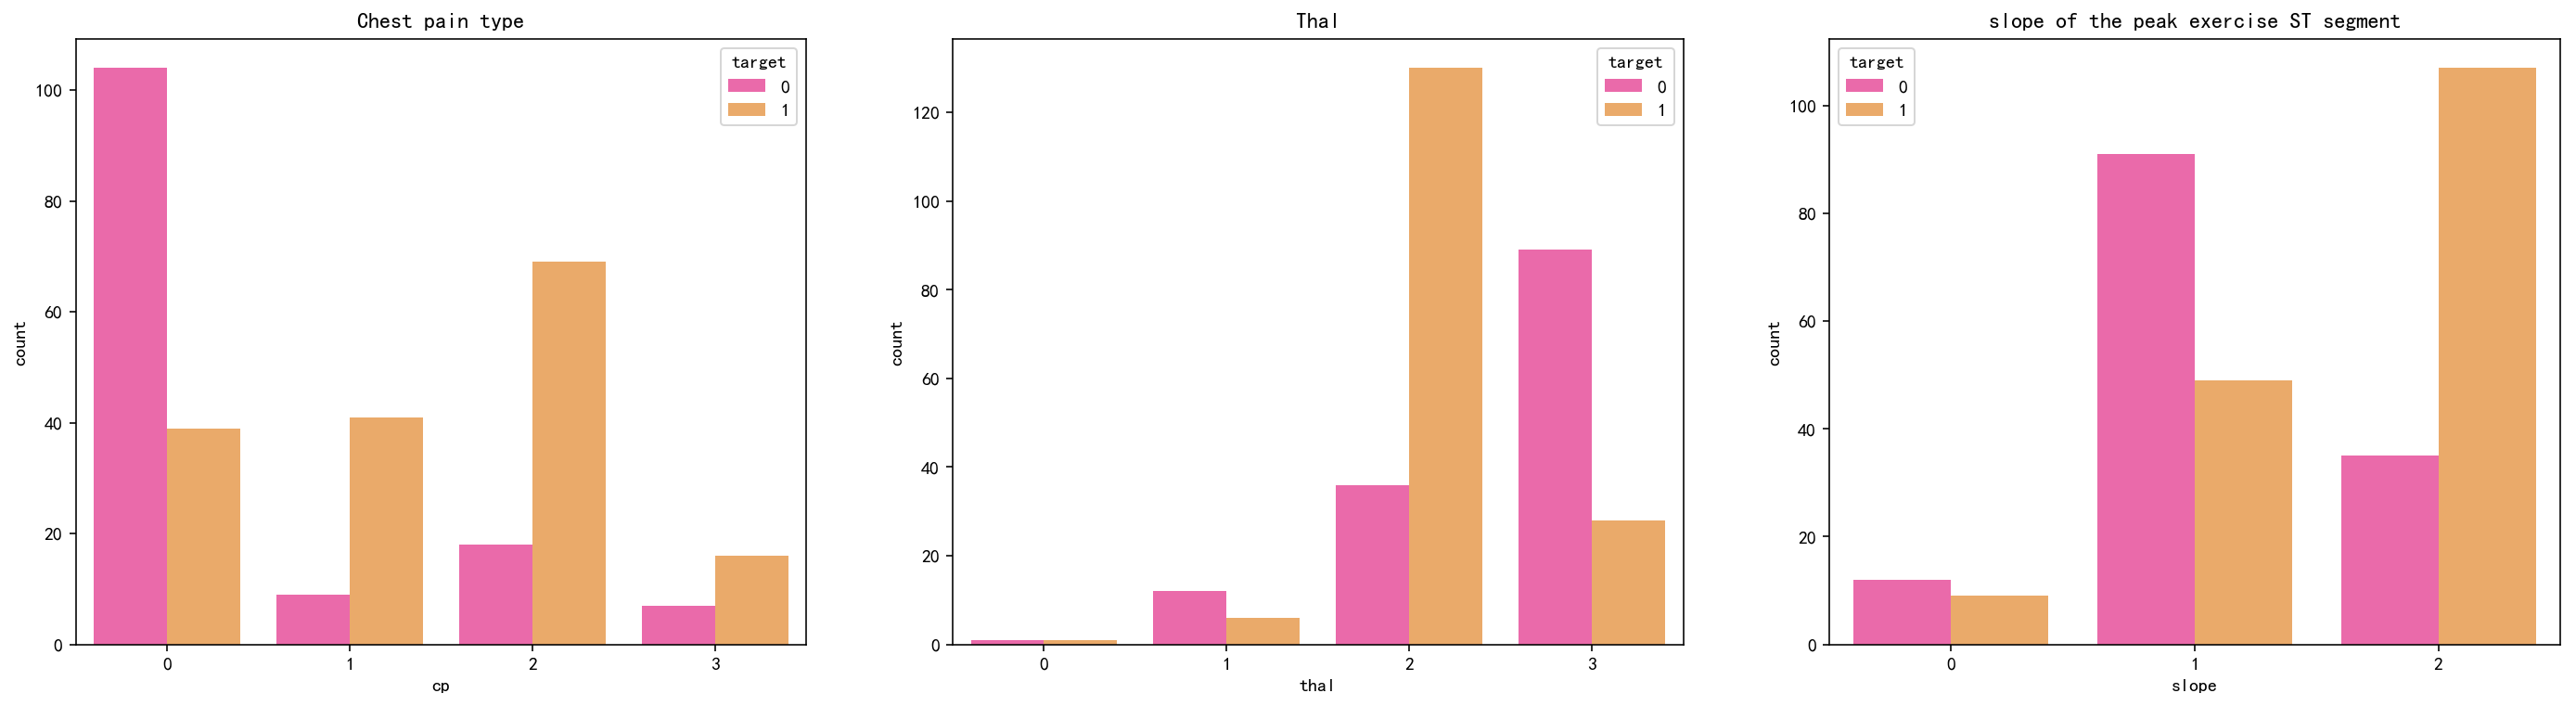

In [6]:
fig, ax = plt.subplots(figsize=(24, 6))
plt.subplot(131)
x1 = sns.countplot(
    x='cp', data=df, hue='target', palette='spring', linewidth=3)
x1.set_title('Chest pain type')
# 2型人的胸痛患心脏病的几率最高

plt.subplot(132)
x2 = sns.countplot(
    x='thal', data=df, hue='target', palette='spring', linewidth=3)
x2.set_title('Thal')
# 患有 thal 2的人患心脏病的几率最高

plt.subplot(133)
x3 = sns.countplot(
    x='slope', data=df, hue='target', palette='spring', linewidth=3)
x3.set_title('slope of the peak exercise ST segment')
# 斜坡2人患心脏病的几率较高
plt.show()

以下分析只针对患病人群。

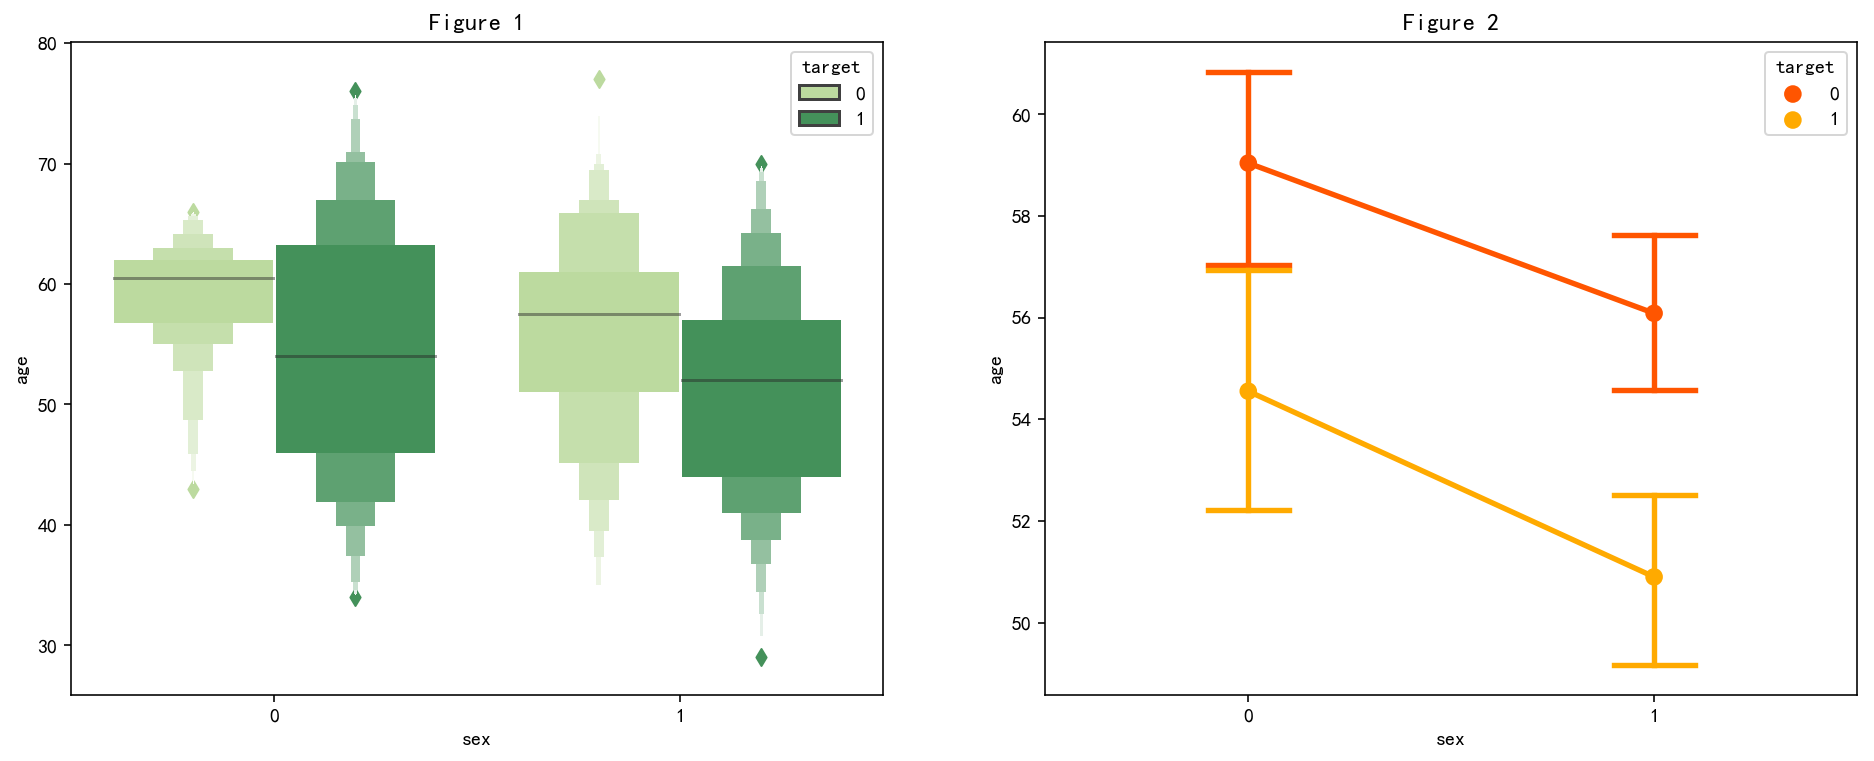

In [7]:
fig, ax = plt.subplots(figsize=(16, 6))
plt.subplot(121)
s1 = sns.boxenplot(
    x='sex', y='age', hue='target', data=df, palette='YlGn', linewidth=3)
s1.set_title("Figure 1")
# Figure 1 says 大多数患有心脏病的女性为 40-70 岁，男性为 40-60 岁

plt.subplot(122)
s2 = sns.pointplot(
    x='sex', y='age', hue='target', data=df, palette='autumn', capsize=.2)
s2.set_title("Figure 2")
# Figure 2 says 心脏病女性的平均年龄约为 54 岁，男性约为 51 岁
plt.show()

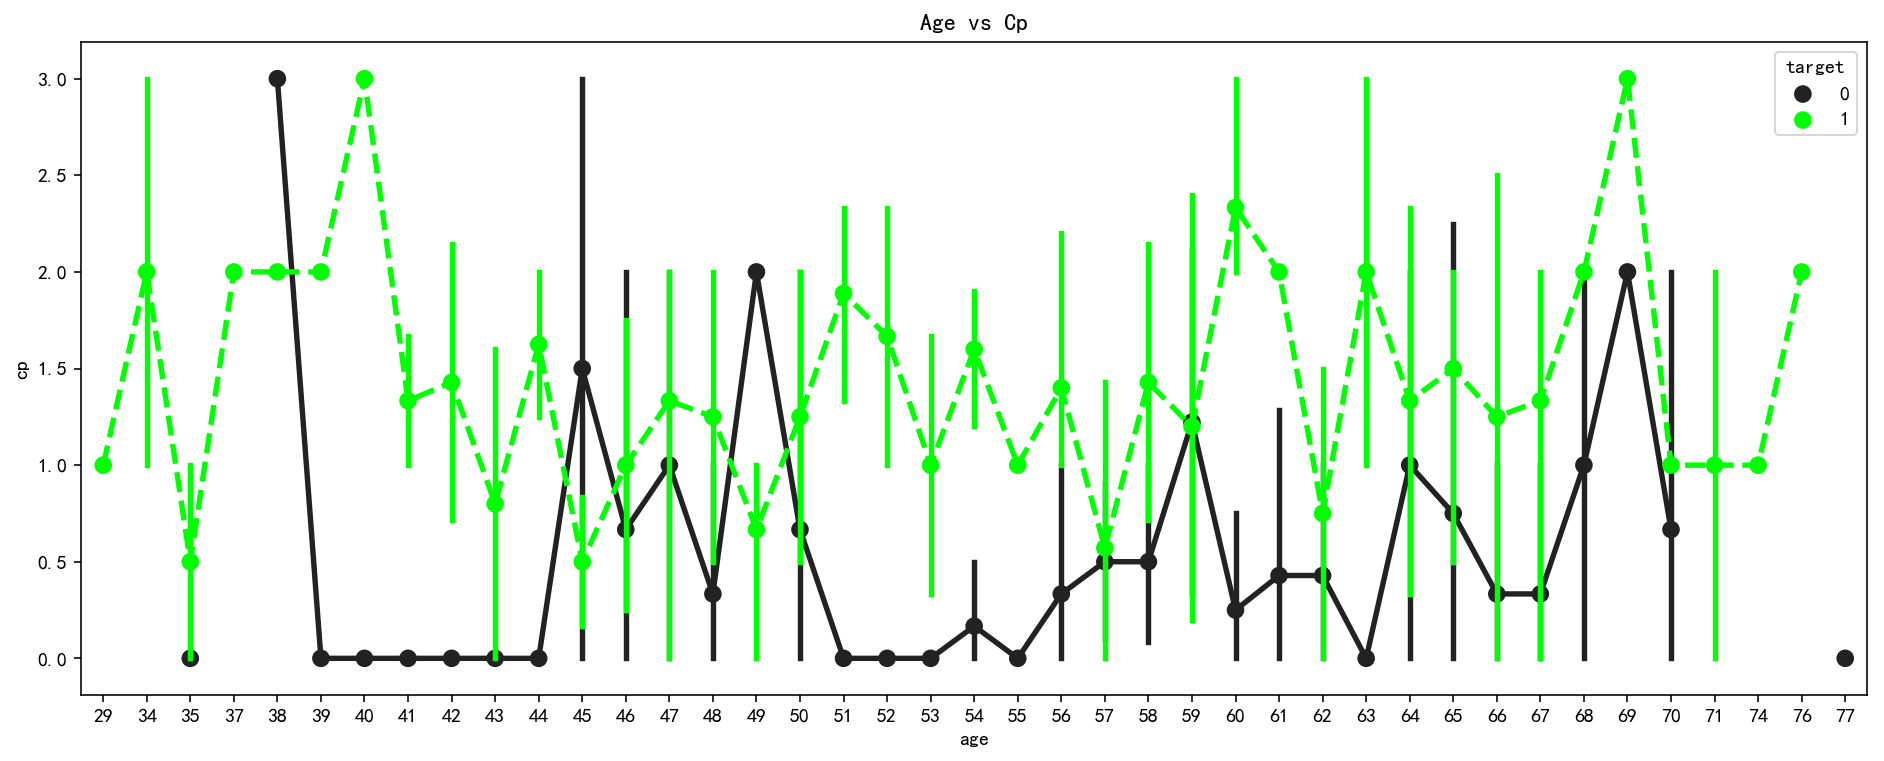

In [8]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.pointplot(
    x='age',
    y='cp',
    data=df,
    color='Lime',
    hue='target',
    linestyles=["-", "--"])
plt.title('Age vs Cp')
plt.show()

患有心脏病的人往往在所有年龄段都有较高的“cp”，只有 45 岁和 49 岁的例外情况。

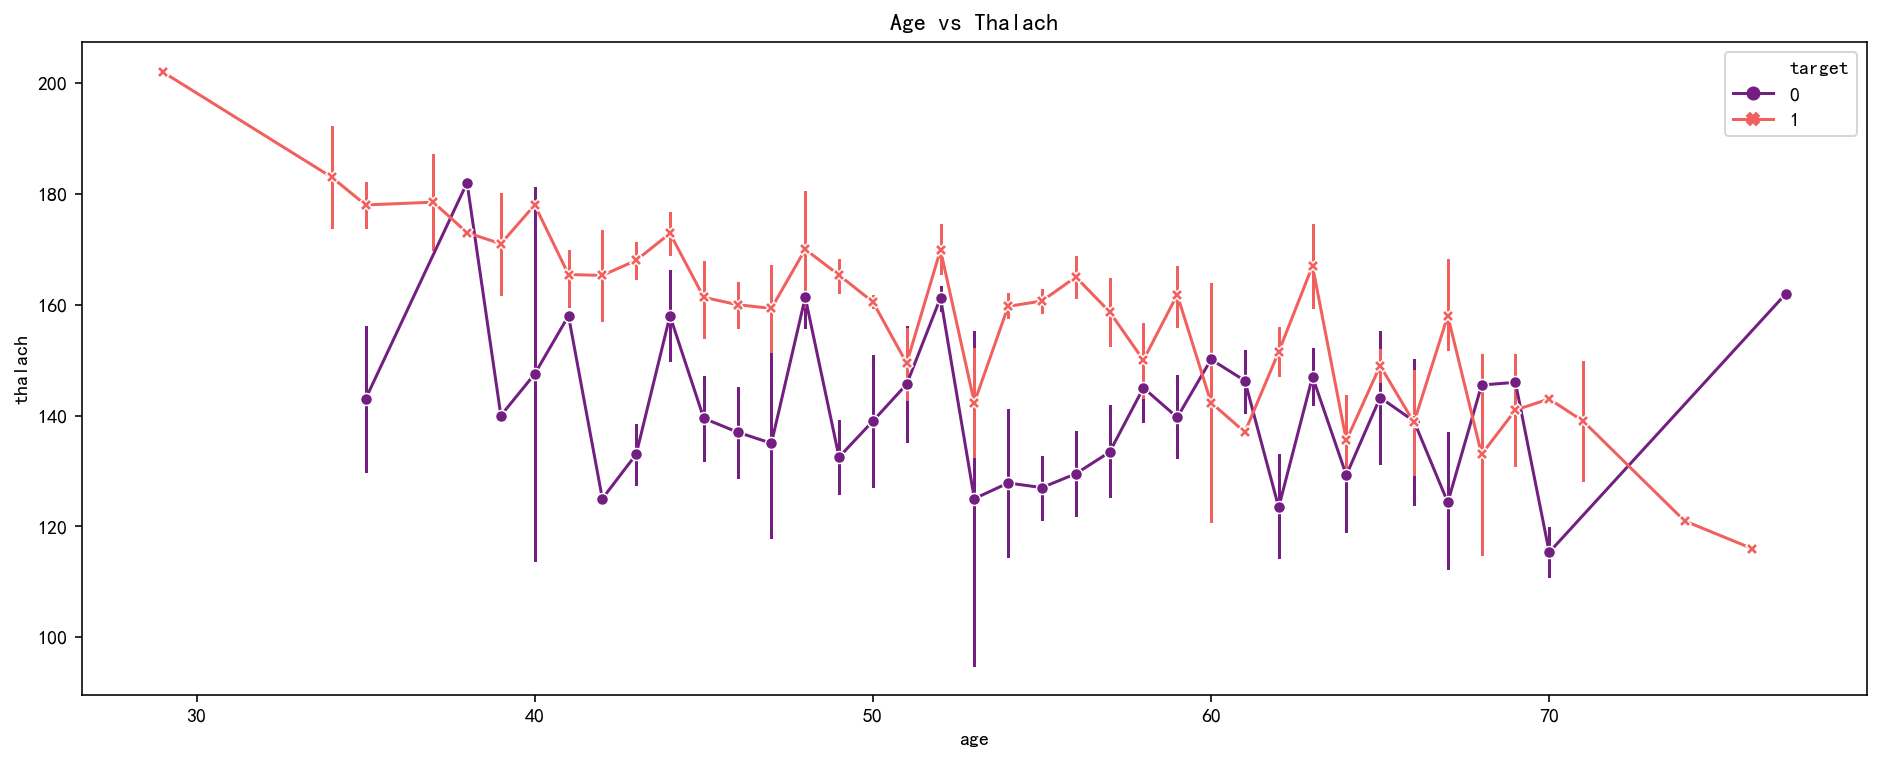

In [9]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(
    y='thalach',
    x='age',
    data=df,
    hue="target",
    style='target',
    palette='magma',
    markers=True,
    dashes=False,
    err_style="bars",
    ci=68)
plt.title('Age vs Thalach')
plt.show()

Thalach 患心脏病的人总是很高，随着年龄增长，丘脑似乎减少，其他因素可能在心脏病中发挥作用。

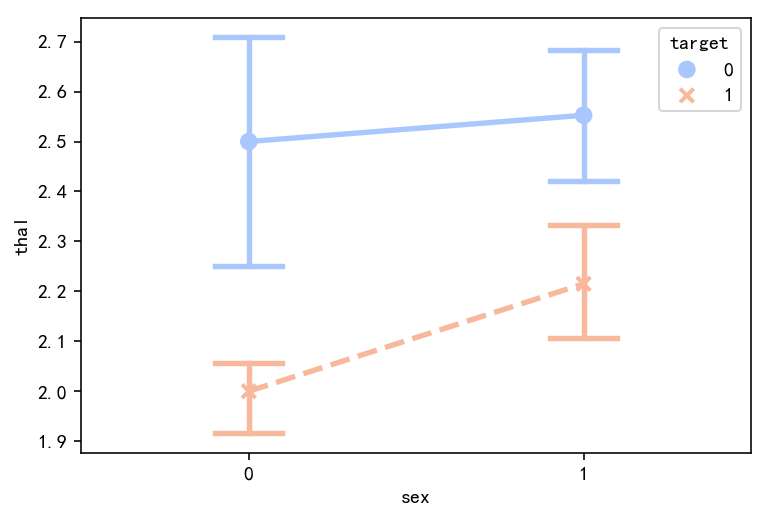

In [10]:
sns.pointplot(
    x='sex',
    y='thal',
    data=df,
    hue='target',
    markers=["o", "x"],
    linestyles=["-", "--"],
    capsize=.2,
    palette='coolwarm')
plt.show()

没有心脏病的男性和女性都具有更高的 thal 值，患有心脏病的男性往往具有比女性更高的 thal。

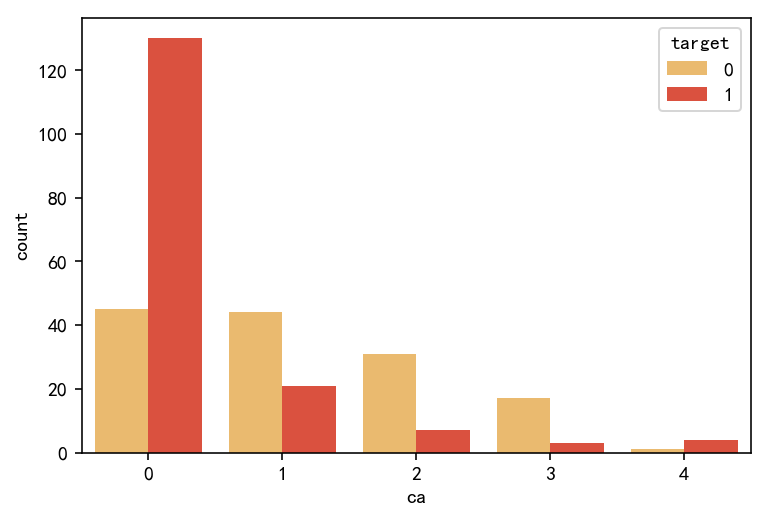

In [11]:
sns.countplot(x='ca', data=df, hue='target', palette='YlOrRd', linewidth=3)
plt.show()
# 'ca'为0的人患心脏病的几率最高

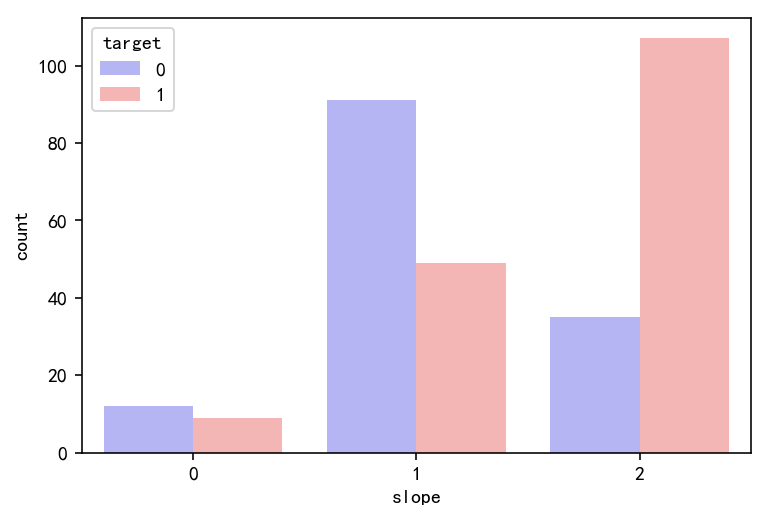

In [12]:
sns.countplot(x='slope',hue='target',data=df,palette='bwr',linewidth=3)
plt.show()
# 坡度2患有心脏病的人数最多

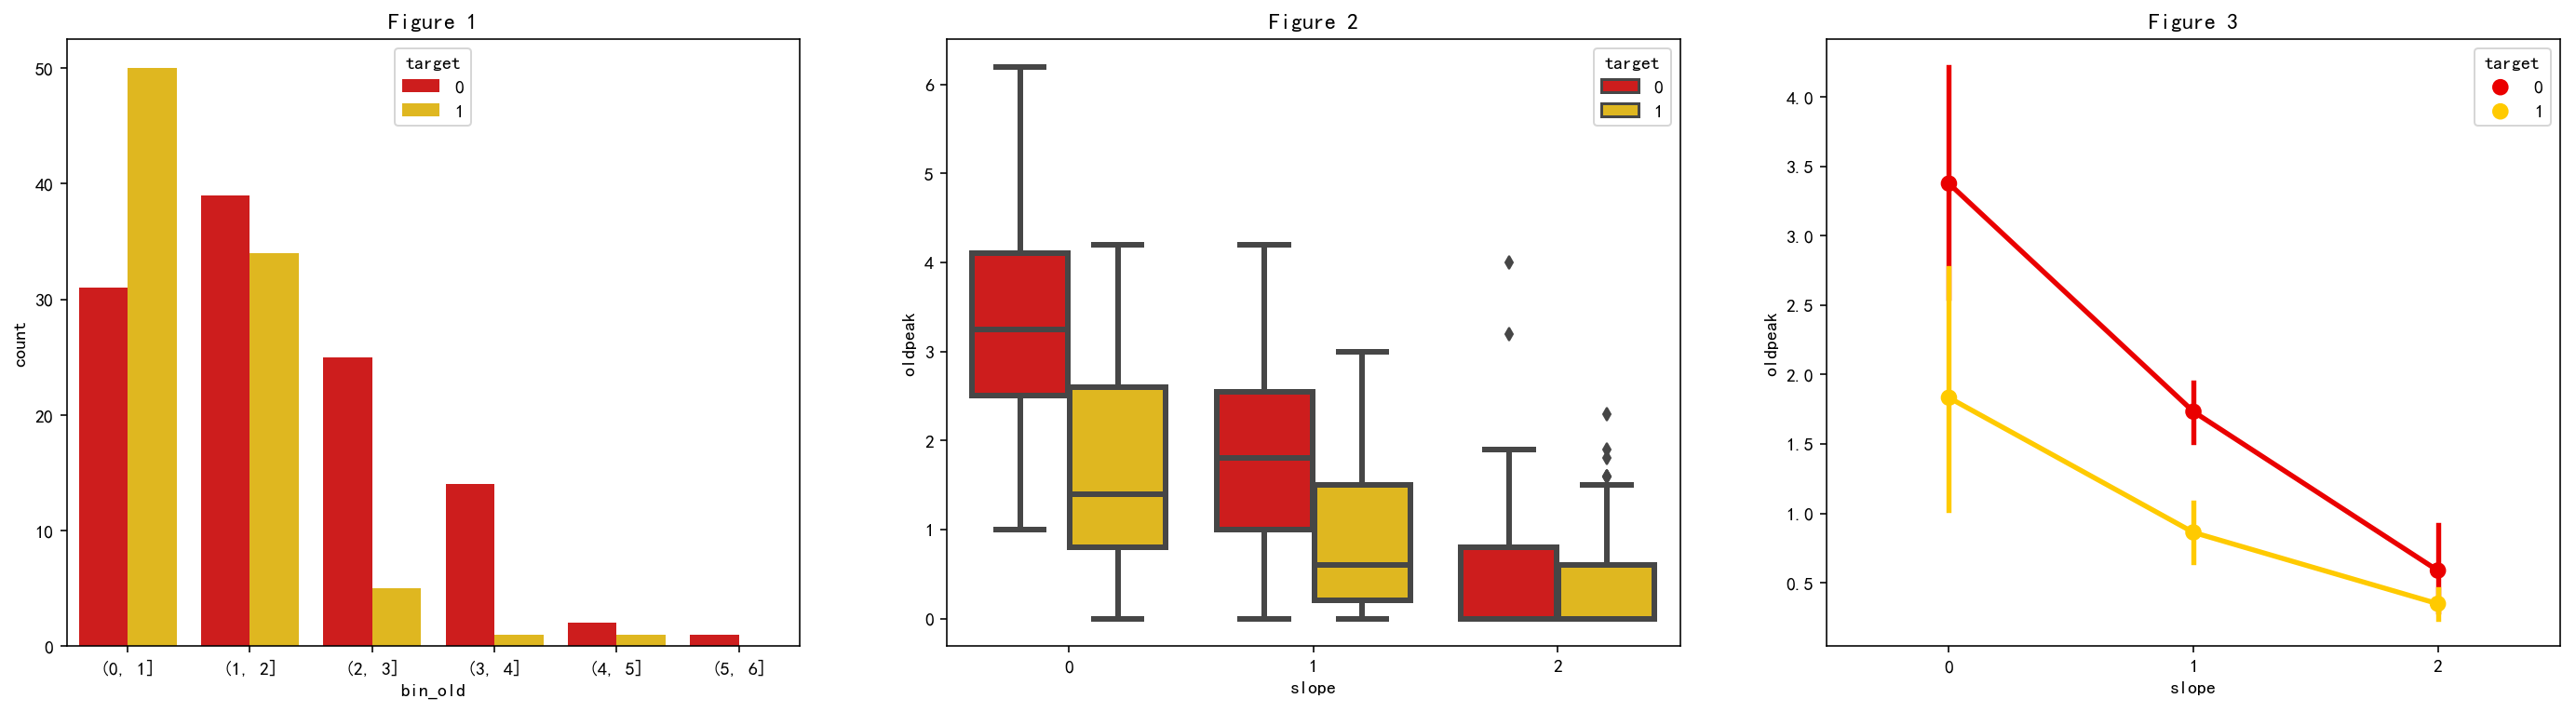

In [13]:
fig, ax = plt.subplots(figsize=(24, 6))
plt.subplot(131)
old_bins = [0, 1, 2, 3, 4, 5, 6]
df['bin_old'] = pd.cut(df['oldpeak'], bins=old_bins)
sns.countplot(x='bin_old', hue='target', data=df, palette='hot', linewidth=3)
plt.title("Figure 1")
# 随着 oldpeak 值的增加，心脏病的发病率下降

plt.subplot(132)
sns.boxplot(
    x='slope', y='oldpeak', data=df, hue='target', palette='hot', linewidth=3)
plt.title("Figure 2")
# slope-s 和 target = 1;
# 对于s = 0  - > Median Oldpeak = ~1.4;
# 对于s = 1  - > Median Oldpeak = ~0.7;
# 对于s = 2  - > Median Oldpeak = ~0

plt.subplot(133)
sns.pointplot(x='slope', y='oldpeak', data=df, hue='target', palette='hot')
plt.title("Figure 3")
# 随着坡度值的增加，旧的峰值降低，心脏病患者的衰老率降低
plt.show()

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,bin_age,bin_chol,bin_thal,bin_old
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,"(60, 70]","(200, 250]","(140, 160]","(2, 3]"
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,"(30, 40]","(200, 250]","(180, 200]","(3, 4]"
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,"(40, 50]","(200, 250]","(160, 180]","(1, 2]"
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,"(50, 60]","(200, 250]","(160, 180]","(0, 1]"
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,"(50, 60]","(350, 400]","(160, 180]","(0, 1]"


In [15]:
df.drop(['bin_age', 'bin_chol', 'bin_thal', 'bin_old'], axis=1, inplace=True)

In [16]:
import numpy as np

# 离群点检测
from collections import Counter


def detect_outliers(df, n, features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []

    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col], 75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step)
                              | (df[col] > Q3 + outlier_step)].index

        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)

    return multiple_outliers


# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(df, 2, ['trestbps', 'chol', 'thalach'])

In [17]:
Outliers_to_drop

[]

没有离群点。

In [18]:
df.loc[Outliers_to_drop]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [19]:
# Checking Missing Data
df.isnull().sum()
# No missing data

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

## 转换为类别变量

In [22]:
# Conversion to categorical variables
df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['fbs'] = df['fbs'].astype('category')
df['restecg'] = df['restecg'].astype('category')
df['exang'] = df['exang'].astype('category')
df['slope'] = df['slope'].astype('category')
df['ca'] = df['ca'].astype('category')
df['thal'] = df['thal'].astype('category')
df['target'] = df['target'].astype('category')
df.dtypes

age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
target      category
dtype: object

In [23]:
y = df['target']

`drop_first=True` 去除相关性。

In [24]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,target_1
0,63,145,233,150,2.3,1,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1
1,37,130,250,187,3.5,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,41,130,204,172,1.4,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
3,56,120,236,178,0.8,1,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,57,120,354,163,0.6,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [25]:
X = df.drop('target_1', axis=1)
X.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
# from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

classifiers = [['Logistic Regression :',
                LogisticRegression()],
               ['Decision Tree Classification :',
                DecisionTreeClassifier()],
               ['Random Forest Classification :',
                RandomForestClassifier()], [
                    'Gradient Boosting Classification :',
                    GradientBoostingClassifier()
                ], ['Ada Boosting Classification :',
                    AdaBoostClassifier()],
               ['Extra Tree Classification :',
                ExtraTreesClassifier()], [
                    'K-Neighbors Classification :',
                    KNeighborsClassifier()
                ], ['Support Vector Classification :',
                    SVC()], ['Gaussian Naive Bayes :',
                             GaussianNB()]]
cla_pred = []
for name, model in classifiers:
    model = model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    cla_pred.append(accuracy_score(y_test, predictions))
    print(name, accuracy_score(y_test, predictions))

Logistic Regression : 0.8791208791208791
Decision Tree Classification : 0.7912087912087912
Random Forest Classification : 0.7692307692307693
Gradient Boosting Classification : 0.8241758241758241
Ada Boosting Classification : 0.8241758241758241
Extra Tree Classification : 0.8021978021978022
K-Neighbors Classification : 0.5824175824175825
Support Vector Classification : 0.5494505494505495
Gaussian Naive Bayes : 0.8681318681318682


/Users/liwei/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


逻辑回归表现最好。

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
log_pred = logmodel.predict(X_test)
print(confusion_matrix(y_test, log_pred))
print(classification_report(y_test, log_pred))
print(accuracy_score(y_test, log_pred))

[[38  6]
 [ 5 42]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        44
           1       0.88      0.89      0.88        47

   micro avg       0.88      0.88      0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91

0.8791208791208791


/Users/liwei/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 逻辑回归超参数的选择

In [29]:
# Hyperparameter tuning for Logistic Regression
from sklearn.model_selection import GridSearchCV

penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)
h_logmodel = GridSearchCV(logmodel, hyperparameters, cv=5, verbose=0)
best_logmodel = h_logmodel.fit(X, y)

print('Best Penalty:', best_logmodel.best_estimator_.get_params()['penalty'])
print('Best C:', best_logmodel.best_estimator_.get_params()['C'])

/Users/liwei/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

/Users/liwei/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

/Users/liwei/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Penalty: l1
Best C: 2.7825594022071245


/Users/liwei/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

In [30]:
logmodel = LogisticRegression(penalty='l1', C=2.7825594022071245)
logmodel.fit(X_train, y_train)
h_log_pred = logmodel.predict(X_test)
print(confusion_matrix(y_test, h_log_pred))
print(classification_report(y_test, h_log_pred))
print(accuracy_score(y_test, h_log_pred))

#3% increase in the accuracy!!

[[37  7]
 [ 2 45]]
              precision    recall  f1-score   support

           0       0.95      0.84      0.89        44
           1       0.87      0.96      0.91        47

   micro avg       0.90      0.90      0.90        91
   macro avg       0.91      0.90      0.90        91
weighted avg       0.91      0.90      0.90        91

0.9010989010989011


/Users/liwei/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


最终提升到了 $90.1 \%$。 